# MODELLING

** import the libraries **

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
df = pd.read_csv('Twitter_stock_final_dataset.csv')


In [13]:
df.head()

,Year,Month,Day,StockName,Positive,Negative,Neutral,Total Tweets,Close,Volume,Open,High,Low,Day_of_week
0,2020,1,1,apple,10,2,8,20,75.0875,135647440.0,74.0600,75.1500,73.7975,Wednesday
1,2020,1,1,microsoft,9,0,11,20,160.6200,22634550.0,158.7800,160.7300,158.3300,Wednesday
2,2020,1,1,tesla,17,3,3,23,86.0520,47791930.0,84.9000,86.1391,84.3420,Wednesday
3,2020,1,1,nvidia,1,0,0,1,59.9775,23767876.0,59.6875,59.9775,59.1800,Wednesday
4,2020,1,1,paypal,1,0,1,2,110.7500,7419283.0,109.4700,111.2100,109.2750,Wednesday


In [4]:
df.dtypes

Year              int64
Month             int64
Day               int64
StockName        object
Positive          int64
Negative          int64
Neutral           int64
Total Tweets      int64
Close           float64
Volume          float64
Open            float64
High            float64
Low             float64
Day_of_week      object
dtype: object

In [5]:
df.isnull().sum()

Year            0
Month           0
Day             0
StockName       0
Positive        0
Negative        0
Neutral         0
Total Tweets    0
Close           0
Volume          0
Open            0
High            0
Low             0
Day_of_week     0
dtype: int64

<h4> feature engineering </h4>

In [6]:
df.corr() # correlation

,Year,Month,Day,Positive,Negative,Neutral,Total Tweets,Close,Volume,Open,High,Low
Year,1.000000,-0.258174,-0.023178,0.022999,0.078817,0.078385,0.069508,0.403152,-0.286026,0.404572,0.399621,0.408980
Month,-0.258174,1.000000,-0.012057,0.003974,-0.018233,-0.060243,-0.040026,0.086547,-0.079436,0.085500,0.083239,0.087158
Day,-0.023178,-0.012057,1.000000,0.000881,-0.004657,0.025214,0.015960,0.006653,0.004501,0.004983,0.005126,0.006218
Positive,0.022999,0.003974,0.000881,1.000000,0.913974,0.567013,0.842240,0.540999,0.253104,0.540088,0.547544,0.532495
Negative,0.078817,-0.018233,-0.004657,0.913974,1.000000,0.542693,0.808152,0.547786,0.181870,0.548210,0.555015,0.539467
Neutral,0.078385,-0.060243,0.025214,0.567013,0.542693,1.000000,0.919269,0.359389,0.134897,0.358764,0.363237,0.353223
Total Tweets,0.069508,-0.040026,0.015960,0.842240,0.808152,0.919269,1.000000,0.496966,0.200829,0.496301,0.502737,0.488859
Close,0.403152,0.086547,0.006653,0.540999,0.547786,0.359389,0.496966,1.000000,-0.311128,0.999192,0.999160,0.999518
Volume,-0.286026,-0.079436,0.004501,0.253104,0.181870,0.134897,0.200829,-0.311128,1.000000,-0.311808,-0.305686,-0.317562
Open,0.404572,0.085500,0.004983,0.540088,0.548210,0.358764,0.496301,0.999192,-0.311808,1.000000,0.999186,0.999494


find the correlation between total tweets and close

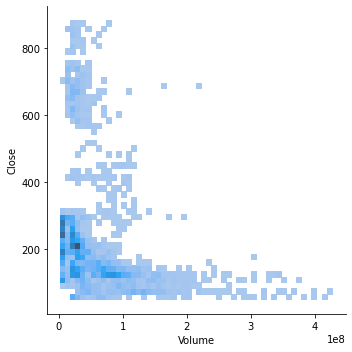

In [18]:
sns.displot(df, x="Volume", y="Close")

          Volume     Close
Volume  1.000000 -0.311128
Close  -0.311128  1.000000


<AxesSubplot:xlabel='Volume', ylabel='Close'>

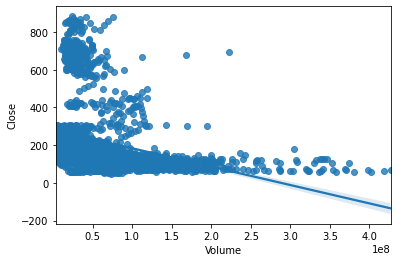

In [7]:
print(df[['Volume','Close']].corr())
sns.regplot(x = 'Volume', y = 'Close', data =df)

           Open     Close
Open   1.000000  0.999192
Close  0.999192  1.000000


<AxesSubplot:xlabel='Open', ylabel='Close'>

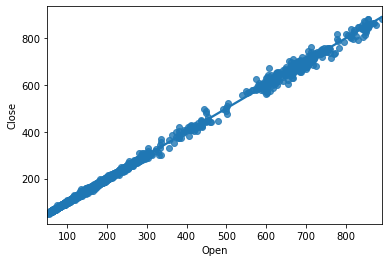

In [8]:
print(df[['Open','Close']].corr())
sns.regplot(x = 'Open', y = 'Close', data = df)

          High    Close
High   1.00000  0.99916
Close  0.99916  1.00000


<AxesSubplot:xlabel='High', ylabel='Close'>

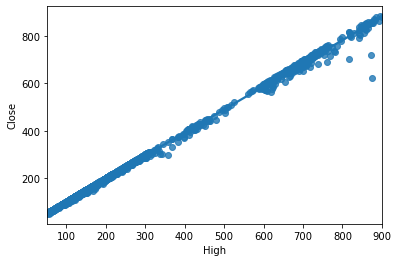

In [9]:
print(df[['High','Close']].corr())
sns.regplot(x = 'High', y = 'Close', data = df)

            Low     Close
Low    1.000000  0.999518
Close  0.999518  1.000000


<AxesSubplot:xlabel='Low', ylabel='Close'>

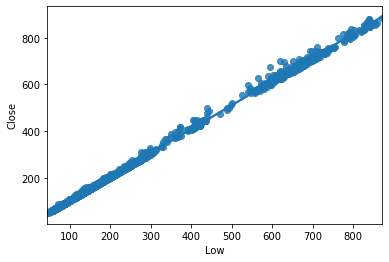

In [10]:
print(df[['Low','Close']].corr())
sns.regplot(x = 'Low', y = 'Close', data = df)

<p>As the Open, High and Low prices goes up, the Close price also goes up: this indicates a positive direct correlation with Close price. Open, High and Low prices seem like pretty good predictors of price since the regression line is almost a perfect diagonal line.</p>

<p>We shall also examine columns that are associalted with the micro headlines</p>

              Total Tweets     Close
Total Tweets      1.000000  0.496966
Close             0.496966  1.000000


<AxesSubplot:xlabel='Total Tweets', ylabel='Close'>

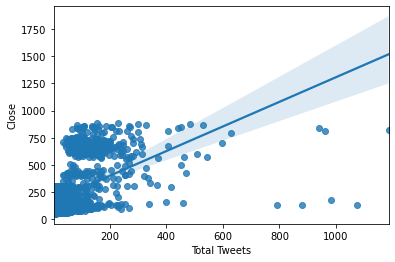

In [69]:
print(df[['Total Tweets','Close']].corr())
sns.regplot(x = 'Total Tweets', y = 'Close', data = df)

          Positive     Close
Positive  1.000000  0.540999
Close     0.540999  1.000000


<AxesSubplot:xlabel='Positive', ylabel='Close'>

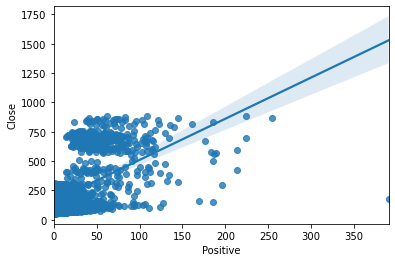

In [70]:
print(df[['Positive','Close']].corr())
sns.regplot(x = 'Positive', y = 'Close', data = df)

<p> We find from some regression plots and correlation table that the macroheadlines (twitter) associated columns fairly correlate with the Close price. However, since our research involves prediction with macroheadlines (sentiment analysis), we shall also include the associated columns in our models. </p>

<AxesSubplot:xlabel='StockName', ylabel='Close'>

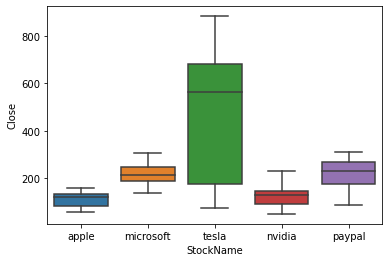

In [14]:
sns.boxplot(x="StockName", y="Close", data=df)

<AxesSubplot:xlabel='Day_of_week', ylabel='Close'>

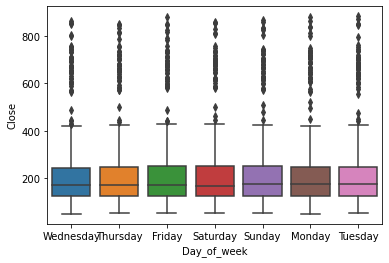

In [15]:
sns.boxplot(x="Day_of_week", y="Close", data=df)

<h4> feature selection </h4>
<p> Our feature selection involves selecting close columns as response variable (y) and all the other columns as independent variables (X)</p>


In [19]:
y = df.loc[:, 'Close'].values

In [20]:
y

array([ 75.0875, 160.62  ,  86.052 , ..., 269.91  , 212.46  , 269.49  ])

In [21]:
X = df.drop('Close', axis = 1).values

In [22]:
X

array([[2020, 1, 1, ..., 75.15, 73.7975, 'Wednesday'],
       [2020, 1, 1, ..., 160.73, 158.33, 'Wednesday'],
       [2020, 1, 1, ..., 86.1391, 84.342, 'Wednesday'],
       ...,
       [2021, 9, 20, ..., 273.0, 265.68, 'Monday'],
       [2021, 9, 21, ..., 214.25, 209.5, 'Tuesday'],
       [2021, 9, 21, ..., 272.2986, 267.8, 'Tuesday']], dtype=object)

<h3> Encoding the Categorical variables </h3>

* Label encoding: <p> for the tree based alrorithms such as decision tree and random forest </p>
* One hot encoding: <p> for linear models, SVMs, or ensemble methods as their data needs to be standardized. </p>

In [23]:
# Encoding the Independent or ohject variable Day_of_week
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, -1] = labelencoder_X.fit_transform(X[:, -1]) #Day_of_week

X[:, 3] = labelencoder_X.fit_transform(X[:, 3]) #stockName

In [24]:
X

array([[2020, 1, 1, ..., 75.15, 73.7975, 6],
       [2020, 1, 1, ..., 160.73, 158.33, 6],
       [2020, 1, 1, ..., 86.1391, 84.342, 6],
       ...,
       [2021, 9, 20, ..., 273.0, 265.68, 1],
       [2021, 9, 21, ..., 214.25, 209.5, 5],
       [2021, 9, 21, ..., 272.2986, 267.8, 5]], dtype=object)

## MODELS  
### ENSEMBLE MODELS
<break>
    </break>
       <h4> DECISION TREE </h4> 
       <p>without standardizing

In [25]:
X_D = X #independent variables for decision tree
y_D = y #Response variable for decision tree


In [26]:
from sklearn import utils

print(utils.multiclass.type_of_target(y_D))

continuous


We cannot pass floats to a classifier which expects categorical values as the Response target vector. Therefore, we convert it to int it will be accepted as input.

In [27]:
y_enc = LabelEncoder()
y_DEncoded = y_enc.fit_transform(y_D)
print(y_DEncoded)
print(utils.multiclass.type_of_target(y_D))
print(utils.multiclass.type_of_target(y_D.astype('int')))
print(utils.multiclass.type_of_target(y_DEncoded))

[ 198 1359  304 ... 2316 1865 2313]
continuous
multiclass
multiclass


split the dataset into training and test.

In [28]:
from sklearn.model_selection import train_test_split

X_Dtrain, X_Dtest, y_Dtrain, y_Dtest =  train_test_split(X_D,y_DEncoded, test_size = 0.3, random_state= 0)

Fit the data in Decision tree classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_Dtrain,y_Dtrain) 

Make prediction and check accuracy

In [30]:
#prediction
y_DPred = classifier.predict(X_Dtest)

#Accuracy
from sklearn import metrics

print('Accuracy Score:', metrics.accuracy_score(y_Dtest, y_DPred))
print('Mean absolute error: ', metrics.mean_absolute_error(y_Dtest, y_DPred))

Accuracy Score: 0.0011173184357541898
Mean absolute error:  61.312849162011176


In [31]:
#rmse
import math
mse =np.square(np.subtract(y_Dtest, y_DPred)).mean()
rmse = math.sqrt(mse)
print('rmse: ', rmse)

rmse:  95.58109838621381


<h5>INFERENCE</h5>
<p> the Decision tree classifier is extremely poor. This is because decision tree works best for predicting a response variable that is categorical. While we tried to convert the float type to int and also label encode it, the performance is very poor.</p>

In [86]:
# import numpy as np
# from sklearn import linear_model
# from sklearn import svm

# classifiers = [
#     svm.SVR(),
#     linear_model.SGDRegressor(),
#     linear_model.BayesianRidge(),
#     linear_model.LassoLars(),
#     linear_model.ARDRegression(),
#     linear_model.PassiveAggressiveRegressor(),
#     linear_model.TheilSenRegressor(),
#     linear_model.LinearRegression()]

# trainingData    = np.array([ [2.3, 4.3, 2.5],  [1.3, 5.2, 5.2],  [3.3, 2.9, 0.8],  [3.1, 4.3, 4.0]  ])
# trainingScores  = np.array( [3.4, 7.5, 4.5, 1.6] )
# predictionData  = np.array([ [2.5, 2.4, 2.7],  [2.7, 3.2, 1.2] ])

# for item in classifiers:
#     print(item)
#     clf = item
#     clf.fit(trainingData, trainingScores)
#     print(clf.predict(predictionData),'\n')

<h4> RANDOM FOREST </h4>

In [32]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_Dtrain,y_Dtrain)

y_pred=clf.predict(X_Dtest)

In [33]:
from sklearn import metrics

print('Accuracy Score:', metrics.accuracy_score(y_Dtest, y_pred))
print('Mean absolute error: ', metrics.mean_absolute_error(y_Dtest, y_pred))

Accuracy Score: 0.0011173184357541898
Mean absolute error:  70.87486033519554


In [34]:
import math

mse =np.square(np.subtract(y_Dtest, y_pred)).mean()
rmse = math.sqrt(mse)
print('rmse: ', rmse)

rmse:  174.42911511877057


<h5>INFERENCE</h5>
<p> the Random forest classifier is extremely poor. We may conclude that ensemble models are not favourable for this problem.</p>
<p> But first, let us try and standardize the values if there will be any difference</p>

In [35]:
# create another copy of the data

y_scale = y_DEncoded
X_scale = X_D

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(X_scale)
data_scaled = scaler.fit_transform(y_scale.reshape(-1,1))

In [36]:
y_scale

array([ 198, 1359,  304, ..., 2316, 1865, 2313])

In [37]:
# split the data

X_Strain, X_Stest, y_Strain, y_Stest =  train_test_split(X_scale,y_scale, test_size = 0.3, random_state= 0)

In [38]:
# Decision tree classifier

#train
classifier = classifier.fit(X_Strain,y_Strain) 

#prediction
y_SPred = classifier.predict(X_Stest)

#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_Stest, y_SPred))

#rmse
mse =np.square(np.subtract(y_Stest, y_SPred)).mean()
rmse = math.sqrt(mse)
print('rmse: ', rmse)

Accuracy Score: 0.0011173184357541898
rmse:  120.06038517923169


In [39]:
# Random forest classifier

#train
clf = clf.fit(X_Strain,y_Strain) 

#prediction
y_SPred = clf.predict(X_Stest)

#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_Stest, y_SPred))
print('Mean absolute error: ', metrics.mean_absolute_error(y_Stest, y_SPred))

#rmse
mse =np.square(np.subtract(y_Stest, y_SPred)).mean()
rmse = math.sqrt(mse)
print('rmse: ', rmse)

Accuracy Score: 0.0011173184357541898
Mean absolute error:  74.57430167597765
rmse:  179.4955936964041


Our assumption was confirmed, we therefore can conclude that ensemble models cannot be used for our stock prediction uaing macroheadlines problem

### LINEAR MODELS

<h4>LINEAR REGRESSION</h4>

In [40]:

from sklearn.linear_model import LinearRegression

# X_lin = X
# y_lin = y
X_reg = df.drop('Close', axis = 1).values
y_reg = df.Close.values

regEnc = LabelEncoder()
X_reg[:, -1] = regEnc.fit_transform(X_reg[:, -1]) #Day_of_week

X_reg[:, 3] = regEnc.fit_transform(X_reg[:, 3]) #stockName

X_reg = X.astype('float')
X_reg
# le = preprocessing.LabelEncoder()
# for i in range(*NUMBER OF FEATURES*):
#     myData[:,i] = le.fit_transform(myData[:,i])

array([[2.020000e+03, 1.000000e+00, 1.000000e+00, ..., 7.515000e+01,
        7.379750e+01, 6.000000e+00],
       [2.020000e+03, 1.000000e+00, 1.000000e+00, ..., 1.607300e+02,
        1.583300e+02, 6.000000e+00],
       [2.020000e+03, 1.000000e+00, 1.000000e+00, ..., 8.613910e+01,
        8.434200e+01, 6.000000e+00],
       ...,
       [2.021000e+03, 9.000000e+00, 2.000000e+01, ..., 2.730000e+02,
        2.656800e+02, 1.000000e+00],
       [2.021000e+03, 9.000000e+00, 2.100000e+01, ..., 2.142500e+02,
        2.095000e+02, 5.000000e+00],
       [2.021000e+03, 9.000000e+00, 2.100000e+01, ..., 2.722986e+02,
        2.678000e+02, 5.000000e+00]])

In [41]:
# split the data
X_Ltrain, X_Ltest, y_Ltrain, y_Ltest =  train_test_split(X_reg,y_reg, test_size = 0.3, random_state= 0)

In [42]:
reg = LinearRegression()
#Train the model using the training sets y_pred=reg.predict(X_test)
reg = reg.fit(X_Ltrain,y_Ltrain)



In [43]:
y_Lpred=reg.predict(X_Ltest)

In [44]:
#rmse
mse =np.square(np.subtract(y_Ltest, y_Lpred)).mean()
rmse = math.sqrt(mse)
print('rmse: ', rmse)

rmse:  4.091236928796569


In [45]:
#Accuracy
print('Mean absolute error: ', metrics.mean_absolute_error(y_Ltest, y_Lpred))


Mean absolute error:  2.1170349459889044


<p> the rmse and mean absolute error for linear regression is favourable

In [46]:
from sklearn.linear_model import LogisticRegression

y_Ltrain = y_Ltrain.astype('int')

log = LogisticRegression().fit(X_Ltrain,y_Ltrain)


/Users/dahmani/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
y_Lpred=reg.predict(X_Ltest)

In [48]:
#rmse
mse =np.square(np.subtract(y_Ltest, y_Lpred)).mean()
rmse = math.sqrt(mse)
print('rmse: ', rmse)

rmse:  4.091236928796569


In [49]:
#Accuracy
print('Mean absolute error: ', metrics.mean_absolute_error(y_Ltest, y_Lpred))

Mean absolute error:  2.1170349459889044


<h4>BASELINE MODEL</h4>

<p> The baseline for this problem is the mean of the Close price because this is a regression problem

In [50]:
print('The mean of the total Close price: ', y_reg.mean())
print('The mean of the training data: ', y_Ltrain.mean())
print('The mean of the testing data: ', y_Ltest.mean())

The mean of the total Close price:  225.88485355347973
The mean of the training data:  228.4243295019157
The mean of the testing data:  218.79507570783238


In [51]:
import numpy as np

pred = [y_Ltest.mean()] * len(y_Ltest)
pred = np.array(pred, dtype=np.float32)
# pred

In [52]:
#rmse
mse =np.square(np.subtract(y_Ltest, pred)).mean()
rmse = math.sqrt(mse)
print('rmse: ', rmse)


rmse:  164.50794765428228


In [53]:

#Accuracy
print('Mean absolute error: ', metrics.mean_absolute_error(y_Ltest, pred))

Mean absolute error:  108.91560112694545


<h5>INFERENCE</h5>

The RMSE and accuracy scores of Linear and Logistic regression are the same. We can safely say the Linear Regression is the safest model as this is a regression problem with continuous value for our response variable, Close. Baseline algorithms have not performed well on this dataset.

### MODELS FOR CLASSIFICATION AND REGRESSION PROBLEMS
<h4>KNN<h4/>

In [54]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

In [55]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(X_Ltrain,y_Ltrain)
preds = model.predict(X_Ltest)

In [56]:
#rmse
mse =np.square(np.subtract(y_Ltest, preds)).mean()
rmse = math.sqrt(mse)
print('rmse: ', rmse)


rmse:  158.73371395152603


In [57]:

#Accuracy
print('Mean absolute error: ', metrics.mean_absolute_error(y_Ltest, preds))

Mean absolute error:  107.0468028768231


<h5>INFERENCE</h5>

The RMSE values of KNN and Baseline are similar. We can safely say that KNN and Baseline algorithms have not performed well on this dataset.

<h4>LONG SHORT TERM MEMORY<h4/>

In [59]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [60]:
#Loading and Preprocessing Data

# Importing the training set
dataset_train = df
dataset_train.head()

,Year,Month,Day,StockName,Positive,Negative,Neutral,Total Tweets,Close,Volume,Open,High,Low,Day_of_week
0,2020,1,1,apple,10,2,8,20,75.0875,135647440.0,74.0600,75.1500,73.7975,Wednesday
1,2020,1,1,microsoft,9,0,11,20,160.6200,22634550.0,158.7800,160.7300,158.3300,Wednesday
2,2020,1,1,tesla,17,3,3,23,86.0520,47791930.0,84.9000,86.1391,84.3420,Wednesday
3,2020,1,1,nvidia,1,0,0,1,59.9775,23767876.0,59.6875,59.9775,59.1800,Wednesday
4,2020,1,1,paypal,1,0,1,2,110.7500,7419283.0,109.4700,111.2100,109.2750,Wednesday


In [61]:
train = dataset_train.loc[:, ["Open"]].values
train

array([[ 74.06 ],
       [158.78 ],
       [ 84.9  ],
       ...,
       [271.55 ],
       [214.165],
       [271.75 ]])

In [62]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.0285684 ],
       [0.12926297],
       [0.04145236],
       ...,
       [0.26329657],
       [0.19509121],
       [0.26353428]])

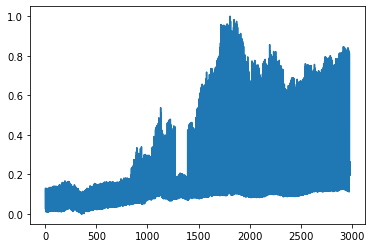

In [64]:
plt.plot(train_scaled)
plt.show()

In [65]:
# Creating a data structure with 50 timesteps and 1 output
X_train = []
y_train = []
timesteps = 50
for i in range(timesteps, 1258):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [66]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train[0:1]

array([[[0.0285684 ],
        [0.12926297],
        [0.04145236],
        [0.01148586],
        [0.07065521],
        [0.0285684 ],
        [0.12926297],
        [0.04145236],
        [0.01148586],
        [0.07065521],
        [0.0288388 ],
        [0.12871623],
        [0.04525574],
        [0.0104013 ],
        [0.07067898],
        [0.028506  ],
        [0.12822496],
        [0.04525337],
        [0.01012595],
        [0.06953797],
        [0.0281732 ],
        [0.12773369],
        [0.04525099],
        [0.0098506 ],
        [0.02784041],
        [0.12724242],
        [0.04524861],
        [0.00957525],
        [0.06839695],
        [0.0296381 ],
        [0.12990479],
        [0.05022391],
        [0.01132243],
        [0.07306798],
        [0.02884177],
        [0.12944125],
        [0.05314776],
        [0.01178597],
        [0.07176057],
        [0.03183551],
        [0.13289401],
        [0.05871021],
        [0.01300127],
        [0.07483893],
        [0.03283532],
        [0

In [67]:
y_train[0:1]


array([0.05599872])

In [68]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
38/38 [==============================] - 3s 26ms/step - loss: 0.3321 - accuracy: 8.2781e-04
Epoch 2/10
38/38 [==============================] - 1s 26ms/step - loss: 0.1969 - accuracy: 8.2781e-04
Epoch 3/10
38/38 [==============================] - 1s 26ms/step - loss: 0.1360 - accuracy: 8.2781e-04
Epoch 4/10
38/38 [==============================] - 1s 26ms/step - loss: 0.0923 - accuracy: 0.0000e+00
Epoch 5/10
38/38 [==============================] - 1s 26ms/step - loss: 0.0704 - accuracy: 8.2781e-04
Epoch 6/10
38/38 [==============================] - 1s 26ms/step - loss: 0.0530 - accuracy: 8.2781e-04
Epoch 7/10
38/38 [==============================] - 1s 26ms/step - loss: 0.0439 - accuracy: 8.2781e-04
Epoch 8/10
38/38 [==============================] - 1s 26ms/step - loss: 0.0344 - accuracy: 8.2781e-04
Epoch 9/10
38/38 [==============================] - 1s 26ms/step - loss: 0.0292 - accuracy: 8.2781e-04
Epoch 10/10
38/38 [==============================] - 1s 26ms/step - loss:

In [69]:
# Getting the real stock price of 2021
dataset_test = df
dataset_test.head()

,Year,Month,Day,StockName,Positive,Negative,Neutral,Total Tweets,Close,Volume,Open,High,Low,Day_of_week
0,2020,1,1,apple,10,2,8,20,75.0875,135647440.0,74.0600,75.1500,73.7975,Wednesday
1,2020,1,1,microsoft,9,0,11,20,160.6200,22634550.0,158.7800,160.7300,158.3300,Wednesday
2,2020,1,1,tesla,17,3,3,23,86.0520,47791930.0,84.9000,86.1391,84.3420,Wednesday
3,2020,1,1,nvidia,1,0,0,1,59.9775,23767876.0,59.6875,59.9775,59.1800,Wednesday
4,2020,1,1,paypal,1,0,1,2,110.7500,7419283.0,109.4700,111.2100,109.2750,Wednesday


In [70]:
real_stock_price = dataset_test.loc[:, ["Open"]].values
real_stock_price

array([[ 74.06 ],
       [158.78 ],
       [ 84.9  ],
       ...,
       [271.55 ],
       [214.165],
       [271.75 ]])

In [71]:
# Getting the predicted stock price of 2021
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)  # min max scaler
#inputs

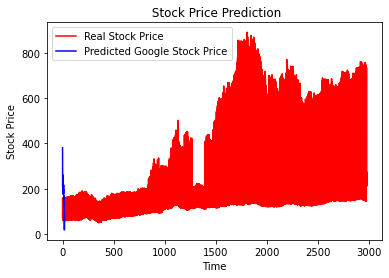

In [72]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

so this model is not recommanded 

LSTMs


In [73]:
import numpy
import pandas as pd 
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [74]:
data = df
data.head()

,Year,Month,Day,StockName,Positive,Negative,Neutral,Total Tweets,Close,Volume,Open,High,Low,Day_of_week
0,2020,1,1,apple,10,2,8,20,75.0875,135647440.0,74.0600,75.1500,73.7975,Wednesday
1,2020,1,1,microsoft,9,0,11,20,160.6200,22634550.0,158.7800,160.7300,158.3300,Wednesday
2,2020,1,1,tesla,17,3,3,23,86.0520,47791930.0,84.9000,86.1391,84.3420,Wednesday
3,2020,1,1,nvidia,1,0,0,1,59.9775,23767876.0,59.6875,59.9775,59.1800,Wednesday
4,2020,1,1,paypal,1,0,1,2,110.7500,7419283.0,109.4700,111.2100,109.2750,Wednesday


In [ ]:
dataset=df
plt.plot(dataset)
plt.xlabel("stockname")
plt.ylabel("Close")
plt.show()

In [76]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(2983, 1)

In [77]:
# scaling 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [78]:
train_size = int(len(dataset) * 0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 1491, test size: 1492 


In [79]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = numpy.array(dataX)
trainY = numpy.array(dataY)  

In [80]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = numpy.array(dataX)
testY = numpy.array(dataY)  

In [81]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [82]:
# model
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
1480/1480 [==============================] - 2s 840us/step - loss: 0.0112 - accuracy: 0.0919
Epoch 2/50
1480/1480 [==============================] - 1s 835us/step - loss: 2.9935e-04 - accuracy: 0.0919
Epoch 3/50
1480/1480 [==============================] - 1s 844us/step - loss: 2.9660e-04 - accuracy: 0.0919
Epoch 4/50
1480/1480 [==============================] - 1s 852us/step - loss: 2.4943e-04 - accuracy: 0.0919
Epoch 5/50
1480/1480 [==============================] - 1s 858us/step - loss: 2.2720e-04 - accuracy: 0.0919
Epoch 6/50
1480/1480 [==============================] - 1s 860us/step - loss: 2.1071e-04 - accuracy: 0.0919
Epoch 7/50
1480/1480 [==============================] - 1s 860us/step - loss: 1.9247e-04 - accuracy: 0.0919
Epoch 8/50
1480/1480 [==============================] - 1s 952us/step - loss: 1.8594e-04 - accuracy: 0.0919
Epoch 9/50
1480/1480 [==============================] - 1s 842us/step - loss: 1.5544e-04 - accuracy: 0.0919
Epoch 10/50
1480/1480 [=========

In [83]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.12 RMSE
Test Score: 0.34 RMSE


In [ ]:
# shifting train
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()